In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import statistics
# Upload train and test csv files in variables
test_data=pd.read_csv('Test.csv')
train_data=pd.read_csv('Train.csv')
print("Shape of the Test data:",test_data.shape)
print("Shape of the Train Data:",train_data.shape)

Shape of the Test data: (5681, 11)
Shape of the Train Data: (8523, 12)


In [591]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [592]:
train_data.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [593]:
train_data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [594]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [595]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [596]:
duplicate=train_data.duplicated()
print(duplicate.sum())

0


In [597]:
train_data.boxplot(column=['Item_Weight'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [598]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(0)

In [599]:
train_data['Item_Weight'].head(16)

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7      0.000
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
Name: Item_Weight, dtype: float64

In [600]:
mean1=statistics.mean(train_data['Item_Weight'])
print(mean1)

10.650589581133405


In [601]:
# Here the data we are replacing 0 to 12.857645 in column item_weight
train_data['Item_Weight']=train_data['Item_Weight'].replace(0,12.857645)

In [602]:
train_data['Item_Weight'].head(16)

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
5     10.395000
6     13.650000
7     12.857645
8     16.200000
9     19.200000
10    11.800000
11    18.500000
12    15.100000
13    17.600000
14    16.350000
15     9.000000
Name: Item_Weight, dtype: float64

In [603]:
mode1=statistics.mode(train_data['Outlet_Size'])
print(mode1)

Medium


In [604]:
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna("Medium")

In [605]:
train_data['Item_Type'].head()

0                    Dairy
1              Soft Drinks
2                     Meat
3    Fruits and Vegetables
4                Household
Name: Item_Type, dtype: object

In [606]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [607]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [608]:
from sklearn.preprocessing import LabelEncoder
data = train_data['Item_Type']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data)
# Transform the data using the encoder
train_data['Item_Type'] = le.transform(data)
print(train_data['Item_Type'].head(10))

0     4
1    14
2    10
3     6
4     9
5     0
6    13
7    13
8     5
9     5
Name: Item_Type, dtype: int32


In [609]:
# train_data['Item_Fat_Content'].mask(train_data['Item_Fat_Content'] == 'LF', 'Low Fat', inplace=True)
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('LF','Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('reg','Regular')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('low fat','Low Fat')
print(train_data['Item_Fat_Content'].head(30))
# train_data['Item_Fat_Content'].mask(train_data['Item_Fat_Content'] == 'low fat', 'Low Fat', inplace=True)
# train_data['Item_Fat_Content'].mask(train_data['Item_Fat_Content'] == 'reg', 'Regular', inplace=True)

0     Low Fat
1     Regular
2     Low Fat
3     Regular
4     Low Fat
5     Regular
6     Regular
7     Low Fat
8     Regular
9     Regular
10    Low Fat
11    Regular
12    Regular
13    Regular
14    Low Fat
15    Regular
16    Low Fat
17    Regular
18    Low Fat
19    Low Fat
20    Regular
21    Regular
22    Low Fat
23    Low Fat
24    Regular
25    Low Fat
26    Regular
27    Low Fat
28    Regular
29    Regular
Name: Item_Fat_Content, dtype: object


In [610]:
data1 = train_data['Item_Fat_Content']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data1)
# Transform the data using the encoder
train_data['Item_Fat_Content'] = le.transform(data1)
print(train_data['Item_Fat_Content'].head(10))

0    0
1    1
2    0
3    1
4    0
5    1
6    1
7    0
8    1
9    1
Name: Item_Fat_Content, dtype: int32


In [611]:
data3 = train_data['Outlet_Size']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data3)
# Transform the data using the encoder
train_data['Outlet_Size'] = le.transform(data3)
print(train_data['Outlet_Size'].head(10))

0    1
1    1
2    1
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: Outlet_Size, dtype: int32


In [612]:
data3 = train_data['Item_Identifier']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data3)
# Transform the data using the encoder
train_data['Item_Identifier'] = le.transform(data3)
print(train_data['Item_Identifier'].head(10))

0     156
1       8
2     662
3    1121
4    1297
5     758
6     696
7     738
8     440
9     990
Name: Item_Identifier, dtype: int32


In [613]:
data3 = train_data['Outlet_Location_Type']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data3)
# Transform the data using the encoder
train_data['Outlet_Location_Type'] = le.transform(data3)
print(train_data['Outlet_Location_Type'].head(10))

0    0
1    2
2    0
3    2
4    2
5    2
6    2
7    2
8    1
9    1
Name: Outlet_Location_Type, dtype: int32


In [614]:
data3 = train_data['Outlet_Type']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data3)
# Transform the data using the encoder
train_data['Outlet_Type'] = le.transform(data3)
print(train_data['Outlet_Type'].head(10))

0    1
1    2
2    1
3    0
4    1
5    2
6    1
7    3
8    1
9    1
Name: Outlet_Type, dtype: int32


In [615]:
data3 = train_data['Outlet_Identifier']
le = LabelEncoder()
# Fit the encoder to the data
le.fit(data3)
# Transform the data using the encoder
train_data['Outlet_Identifier'] = le.transform(data3)
print(train_data['Outlet_Identifier'].head(10))

0    9
1    3
2    9
3    0
4    1
5    3
6    1
7    5
8    7
9    2
Name: Outlet_Identifier, dtype: int32


In [616]:
train_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


## Visualisation

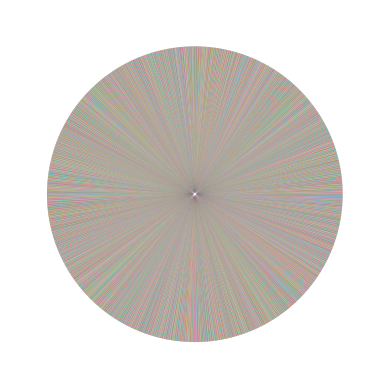

In [651]:
plt.pie(test_data['Item_Type'], startangle = 90)
plt.show()

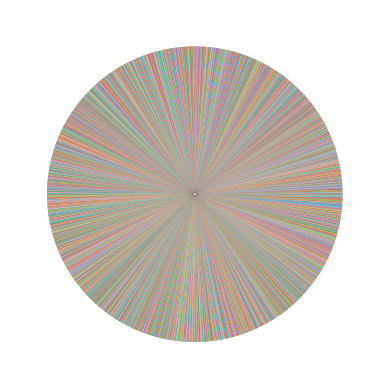

In [650]:
plt.pie(test_data['Item_Fat_Content'], startangle = 90)
plt.show()

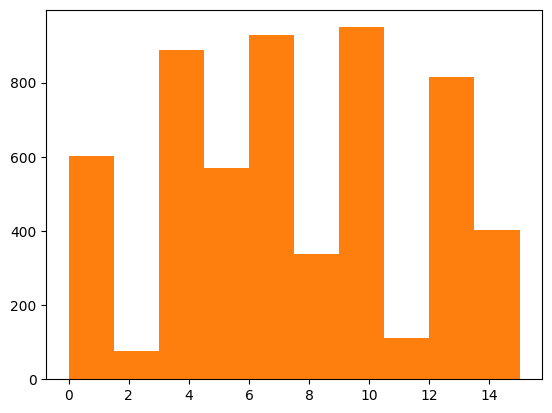

In [653]:
plt.hist(test_data['Item_Type'])
plt.show()

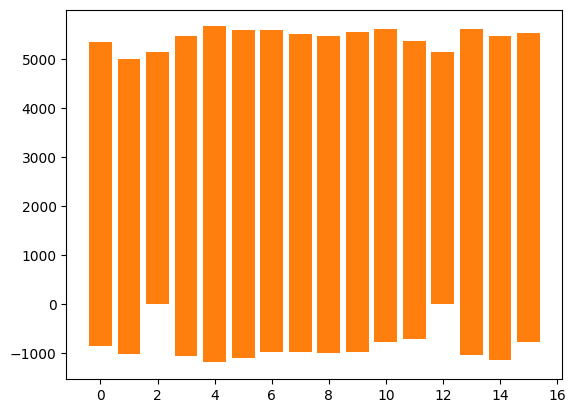

In [655]:
plt.bar(test_data['Item_Type'],test_data['Item_Outlet_Sales'])
plt.show()

## Modelling


In [617]:
X=train_data.drop(columns='Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']


In [618]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [619]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [620]:
# Doing LinearRegression in the model
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the features
y_pred = model.predict(X)

# Calculate the root mean squared error (RMSE) of the model
r2 = mean_squared_error(y, y_pred)
print("RMSE:",r2)


RMSE: 1425658.515478644


In [621]:
# Doing the Multi linear regression on the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Train the multi-linear regression model
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [622]:
model = LinearRegression()


In [623]:
model.fit(X_train, y_train)

LinearRegression()

In [624]:
# Make predictions on the testing set
y_pred = model.predict(X_train)

In [625]:
r2_train = metrics.r2_score(y_train,y_pred)
print("R Squared Value : ",r2_train)

R Squared Value :  0.5070490127351839


## Testing Data

In [626]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [627]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [628]:
mean1=statistics.mean(test_data['Item_Weight'])
# test_data['Item_Weight']=test_data['Item_Weight'].fillna(0)


In [629]:
test_data['Item_Weight'].fillna(12.6,inplace=True)
test_data.head(20)
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [630]:
duplicate=test_data.duplicated()
print(duplicate.sum())

0


In [631]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('LF','Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('reg','Regular')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('low fat','Low Fat')
print(test_data['Item_Fat_Content'].head(30))

0     Low Fat
1     Regular
2     Low Fat
3     Low Fat
4     Regular
5     Regular
6     Regular
7     Low Fat
8     Regular
9     Low Fat
10    Low Fat
11    Low Fat
12    Low Fat
13    Low Fat
14    Low Fat
15    Regular
16    Low Fat
17    Low Fat
18    Low Fat
19    Low Fat
20    Low Fat
21    Low Fat
22    Low Fat
23    Low Fat
24    Low Fat
25    Regular
26    Low Fat
27    Low Fat
28    Low Fat
29    Low Fat
Name: Item_Fat_Content, dtype: object


In [632]:
mode1=statistics.mode(test_data['Outlet_Size'])
test_data['Outlet_Size'].fillna(mode1,inplace=True)


In [633]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [634]:

le1 = LabelEncoder()
# Fit the encoder to the data

# Transform the data using the encoder
test_data['Outlet_Type'] = le1.fit_transform(test_data['Outlet_Type'])
test_data['Item_Identifier'] = le1.fit_transform(test_data['Item_Identifier'])
test_data['Outlet_Identifier'] = le1.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Location_Type'] = le1.fit_transform(test_data['Outlet_Location_Type'])
test_data['Item_Type'] = le1.fit_transform(test_data['Item_Type'])
test_data['Item_Fat_Content'] = le1.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size'] = le1.fit_transform(test_data['Outlet_Size'])

test_data.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.600,1,0.118599,4,234.2300,5,1985,1,2,3
5,461,9.800,1,0.063817,6,117.1492,8,1997,2,0,1
6,604,19.350,1,0.082602,0,50.1034,3,2009,1,2,2
7,266,12.600,0,0.015782,0,81.0592,5,1985,1,2,3
8,668,6.305,1,0.123365,13,95.7436,7,2002,1,1,1
9,170,5.985,0,0.005698,0,186.8924,2,2007,1,1,1


In [635]:
model.fit(X,y)
testing=model.predict(test_data)
print(testing)

[2097.74163512 1168.24234311 2197.44883669 ... 1844.72161963 3205.01151676
 1257.15392146]


In [636]:
Outlet_sales=testing
data=pd.DataFrame(Outlet_sales,columns=['Item_Outlet_Sales'])
test_data['Item_Outlet_Sales']=Outlet_sales
test_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,2097.741635
1,1067,8.300,1,0.038428,4,87.3198,2,2007,1,1,1,1168.242343
2,1406,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,2197.448837
3,809,7.315,0,0.015388,13,155.0340,2,2007,1,1,1,2195.152873
4,1184,12.600,1,0.118599,4,234.2300,5,1985,1,2,3,5056.371065
5,461,9.800,1,0.063817,6,117.1492,8,1997,2,0,1,1839.328443
6,604,19.350,1,0.082602,0,50.1034,3,2009,1,2,2,1242.614521
7,266,12.600,0,0.015782,0,81.0592,5,1985,1,2,3,2766.655755
8,668,6.305,1,0.123365,13,95.7436,7,2002,1,1,1,1475.750864
9,170,5.985,0,0.005698,0,186.8924,2,2007,1,1,1,2721.909053
